# Web Scraping Job Vacancies Part 2


At the moment, I am extending the dataset from my previous web scraping project. In this phase, I intend to include major cities in Indonesia to observe the current trends and combine them into a single dataset. I generated a list of large cities programmatically to see the results. Most of the code used below is based on my earlier project, with the main addition being the inclusion of multiple cities to further analyze the effect.

## Step 1: Data Collection and Preparation


In [2]:
# Data handling and cleaning
import pandas as pd
import numpy as np

# Visualization libraries (commonly used for EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Web scraping essentials
import requests
from bs4 import BeautifulSoup

## Step 2:Exploratory Data Analysis

In [60]:
file_path = 'https://raw.githubusercontent.com/Jasman123/Web_scraping_and_Job_Analyze/main/jobstreet_jobs_with_cities.csv'
df = pd.read_csv(file_path)
df.head()

,Title,Classification,Company,Location,Posting,Salary,Description,Salary_Low,Salary_High,Unit,Currency
0,"Customer Service (Jakarta), Operations, SeaBank",(Call Center & Layanan Konsumen),PT Bank Seabank Indonesia,Jakarta Selatan,1 hari yang lalu,NaN,Carry out services to customers such as delive...,NaN,NaN,NaN,NaN
1,Young Professionals Fast Track,"(Manufaktur, Transportasi & Logistik)",Deliveree (PT Angkut Teknologi Indonesia),Jakarta Selatan,1 hari yang lalu,"Rp 6,000,000 – Rp 9,000,000 per month","If you just click apply, you will not receive ...",6000000.0,9000000.0,month,IDR
2,Customer Service and Operation Specialist (Air...,"(Manufaktur, Transportasi & Logistik)",Easy Speed International Logistics Limited,Jakarta Selatan,3 hari yang lalu,"Rp 8,000,000 – Rp 12,000,000 per month",Airfreight customer service and import and exp...,8000000.0,12000000.0,month,IDR
3,Logistic,"(Manufaktur, Transportasi & Logistik)",NaN,Jakarta Raya,23 jam yang lalu,NaN,"Responsible of logistic from receipt, storage...",NaN,NaN,NaN,NaN
4,Customer Service Specialist,(Call Center & Layanan Konsumen),TE Connectivity,Jakarta Raya,16 jam yang lalu,NaN,"Involves demand planning, order management, cu...",NaN,NaN,NaN,NaN


In [61]:
df = df.drop_duplicates()

In [62]:
df = df[df['Unit']=='month']

In [63]:
df['Average_salary'] = (df['Salary_High'] + df['Salary_Low']) / 2

## Step 3: Machine Learning Implementation on Predicting Job Salary

In [64]:
df.head()

,Title,Classification,Company,Location,Posting,Salary,Description,Salary_Low,Salary_High,Unit,Currency,Average_salary
1,Young Professionals Fast Track,"(Manufaktur, Transportasi & Logistik)",Deliveree (PT Angkut Teknologi Indonesia),Jakarta Selatan,1 hari yang lalu,"Rp 6,000,000 – Rp 9,000,000 per month","If you just click apply, you will not receive ...",6000000.0,9000000.0,month,IDR,7500000.0
2,Customer Service and Operation Specialist (Air...,"(Manufaktur, Transportasi & Logistik)",Easy Speed International Logistics Limited,Jakarta Selatan,3 hari yang lalu,"Rp 8,000,000 – Rp 12,000,000 per month",Airfreight customer service and import and exp...,8000000.0,12000000.0,month,IDR,10000000.0
5,Sales Admin,(Administrasi & Dukungan Perkantoran),PT AAF International Indonesia,Jakarta Utara,10 hari yang lalu,"Rp 5,000,000 – Rp 7,000,000 per month",Sales Admin plays a crucial role in supporting...,5000000.0,7000000.0,month,IDR,6000000.0
6,Senior Videographer (Singapore),"(Periklanan, Seni & Media)",Boom Digital Media,Jakarta Raya,14 hari yang lalu,"$5,000 – $7,500 per month (SGD)",This job will be based in Singapore. The work ...,5000.0,7500.0,month,USD,6250.0
8,Customer Service - Assistant Manager,(Call Center & Layanan Konsumen),redBus,Jakarta Raya,1 hari yang lalu,"Rp 11,000,000 – Rp 14,000,000 per month",Hiring for CS Asst. Manager to lead vendor-man...,11000000.0,14000000.0,month,IDR,12500000.0


In [65]:
df.shape

(779, 12)

In [66]:
df['Classification'] = df['Classification'].str.replace(r"\((.*)\)", r" \1", regex=True)

In [67]:
df.head()

,Title,Classification,Company,Location,Posting,Salary,Description,Salary_Low,Salary_High,Unit,Currency,Average_salary
1,Young Professionals Fast Track,"Manufaktur, Transportasi & Logistik",Deliveree (PT Angkut Teknologi Indonesia),Jakarta Selatan,1 hari yang lalu,"Rp 6,000,000 – Rp 9,000,000 per month","If you just click apply, you will not receive ...",6000000.0,9000000.0,month,IDR,7500000.0
2,Customer Service and Operation Specialist (Air...,"Manufaktur, Transportasi & Logistik",Easy Speed International Logistics Limited,Jakarta Selatan,3 hari yang lalu,"Rp 8,000,000 – Rp 12,000,000 per month",Airfreight customer service and import and exp...,8000000.0,12000000.0,month,IDR,10000000.0
5,Sales Admin,Administrasi & Dukungan Perkantoran,PT AAF International Indonesia,Jakarta Utara,10 hari yang lalu,"Rp 5,000,000 – Rp 7,000,000 per month",Sales Admin plays a crucial role in supporting...,5000000.0,7000000.0,month,IDR,6000000.0
6,Senior Videographer (Singapore),"Periklanan, Seni & Media",Boom Digital Media,Jakarta Raya,14 hari yang lalu,"$5,000 – $7,500 per month (SGD)",This job will be based in Singapore. The work ...,5000.0,7500.0,month,USD,6250.0
8,Customer Service - Assistant Manager,Call Center & Layanan Konsumen,redBus,Jakarta Raya,1 hari yang lalu,"Rp 11,000,000 – Rp 14,000,000 per month",Hiring for CS Asst. Manager to lead vendor-man...,11000000.0,14000000.0,month,IDR,12500000.0


I noticed that the dataset contains many variations of city names, such as Jakarta Utara, Jakarta Selatan, and so on, which actually all refer to the same location (Jakarta). To improve the quality of the data and avoid treating these as separate categories, it would be better to merge related city names into a single standardized form. For example, all Jakarta variants can be grouped into "Jakarta". The same approach should be applied to other cities as well.

In [68]:
string_cities = df['Location'].value_counts().to_string()
print(string_cities)

Location
Jakarta Raya           87
Jakarta Selatan        81
Jakarta Utara          56
Jakarta Pusat          48
Bali                   42
Jakarta Barat          39
Badung                 29
Manado                 25
Surabaya               21
Tangerang              17
Semarang               17
Bandung                15
Jakarta Timur          12
Karawang               12
Denpasar               12
Cikarang Pusat         11
Tangerang Selatan      11
Batam                  11
Makassar               10
Palembang              10
Pekanbaru              10
Cikarang Selatan       10
Cikarang                9
Pontianak               9
Bekasi                  8
Medan                   7
Kalimantan Barat        6
Kuta Utara              6
Sidoarjo                6
Jawa Timur              5
Ubud                    5
Denpasar Barat          5
Malang                  5
Padang                  5
Kabupaten Tangerang     5
Banjarmasin             4
Kabupaten Bekasi        4
Banten                  4
Kut

In [69]:
df.loc[df['Location'].str.contains("Jakarta", case=False), 'Location'] = "Jakarta"
df.loc[df['Location'].str.contains("Bekasi", case=False), 'Location'] = "Bekasi"
df.loc[df['Location'].str.contains("Cikarang", case=False), 'Location'] = "Cikarang"
df.loc[df['Location'].str.contains("Bandung", case=False), 'Location'] = "Bandung"
df.loc[df['Location'].str.contains("Bogor", case=False), 'Location'] = "Bogor"
df.loc[df['Location'].str.contains("Depok", case=False), 'Location'] = "Depok"
df.loc[df['Location'].str.contains("Badung", case=False), 'Location'] = "Bandung"
df.loc[df['Location'].str.contains("Tangerang", case=False), 'Location'] = "Tangerang"

In [70]:
string_cities = df['Location'].value_counts().to_string()
top20_cities = df['Location'].value_counts().nlargest(20).index.tolist()
print(top20_cities)

['Jakarta', 'Bandung', 'Bali', 'Tangerang', 'Cikarang', 'Manado', 'Surabaya', 'Semarang', 'Bekasi', 'Karawang', 'Denpasar', 'Batam', 'Pekanbaru', 'Makassar', 'Palembang', 'Pontianak', 'Medan', 'Kuta Utara', 'Kalimantan Barat', 'Sidoarjo']


In [71]:
df = df[df['Location'].isin(top20_cities)]
df.shape

(651, 12)

In [72]:
df.isnull().sum()

,0
Title,0
Classification,0
Company,35
Location,0
Posting,0
Salary,0
Description,0
Salary_Low,0
Salary_High,0
Unit,0


In [73]:
df = df.dropna()
df.shape

(615, 12)

### Focusing Data to IDR only

/tmp/ipython-input-3419061017.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Average_salary'], kde=True)


<Axes: xlabel='Average_salary', ylabel='Density'>

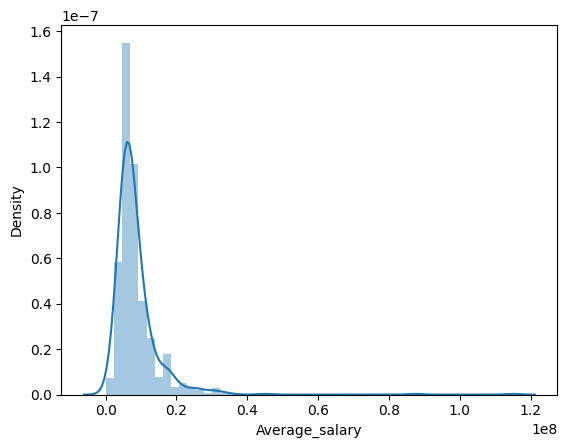

In [78]:
df = df[df['Currency']=='IDR']

sns.distplot(df['Average_salary'], kde=True)

/tmp/ipython-input-655939146.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Average_salary'], kde=True)


<Axes: xlabel='Average_salary', ylabel='Density'>

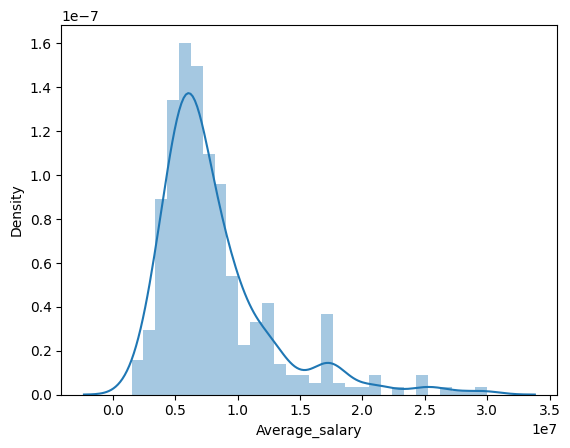

In [79]:
#Remove outlier value and take 99% data
q = df['Average_salary'].quantile(0.99)
df = df[df['Average_salary'] < q]

df = df[df['Average_salary'] > 100000]
sns.distplot(df['Average_salary'], kde=True)

In [81]:
#leveling salary into 4 levels for categorical classification
bins = [0, 5_000_000, 10_000_000, 20_000_000, 40_000_000]
labels = ["level_1", "level_2", "level_3", "level_4"]

df["Salary_level"] = pd.cut(df["Average_salary"], bins=bins, labels=labels)
df.head()

,Title,Classification,Company,Location,Posting,Salary,Description,Salary_Low,Salary_High,Unit,Currency,Average_salary,Salary_level
1,Young Professionals Fast Track,"Manufaktur, Transportasi & Logistik",Deliveree (PT Angkut Teknologi Indonesia),Jakarta,1 hari yang lalu,"Rp 6,000,000 – Rp 9,000,000 per month","If you just click apply, you will not receive ...",6000000.0,9000000.0,month,IDR,7500000.0,level_2
2,Customer Service and Operation Specialist (Air...,"Manufaktur, Transportasi & Logistik",Easy Speed International Logistics Limited,Jakarta,3 hari yang lalu,"Rp 8,000,000 – Rp 12,000,000 per month",Airfreight customer service and import and exp...,8000000.0,12000000.0,month,IDR,10000000.0,level_2
5,Sales Admin,Administrasi & Dukungan Perkantoran,PT AAF International Indonesia,Jakarta,10 hari yang lalu,"Rp 5,000,000 – Rp 7,000,000 per month",Sales Admin plays a crucial role in supporting...,5000000.0,7000000.0,month,IDR,6000000.0,level_2
8,Customer Service - Assistant Manager,Call Center & Layanan Konsumen,redBus,Jakarta,1 hari yang lalu,"Rp 11,000,000 – Rp 14,000,000 per month",Hiring for CS Asst. Manager to lead vendor-man...,11000000.0,14000000.0,month,IDR,12500000.0,level_3
10,Visa & Document Staff,Administrasi & Dukungan Perkantoran,PT Traxist Kreatif Indonesia,Jakarta,19 jam yang lalu,Rp 5.000.000 – Rp 6.500.000 per month,"Competitive monthly salary, supportive and col...",5000000.0,6500000.0,month,IDR,5750000.0,level_2


In [82]:
#Unbalanced Data dispersion case
df['Salary_level'].value_counts()

,count
Salary_level,
level_2,339
level_1,140
level_3,107
level_4,18


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 604 entries, 1 to 11693
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Title           604 non-null    object  
 1   Classification  604 non-null    object  
 2   Company         604 non-null    object  
 3   Location        604 non-null    object  
 4   Posting         604 non-null    object  
 5   Salary          604 non-null    object  
 6   Description     604 non-null    object  
 7   Salary_Low      604 non-null    float64 
 8   Salary_High     604 non-null    float64 
 9   Unit            604 non-null    object  
 10  Currency        604 non-null    object  
 11  Average_salary  604 non-null    float64 
 12  Salary_level    604 non-null    category
dtypes: category(1), float64(3), object(9)
memory usage: 62.1+ KB


In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # Extract words features
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 1. Preparation data feature

#1.1 Combined text feature
df["Combined_text"] = (
    df["Title"].fillna('') + " " +
    df["Classification"].fillna('') + " " +
    df["Company"].fillna('') + " " +
    df["Location"].fillna('')
)

X = df["Combined_text"]

#1.2 Apply one-hot encoder to label data salary
le = LabelEncoder()
df["salary_encoded"] = le.fit_transform(df["Salary_level"])
y = df["salary_encoded"]

# print("Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

In [85]:

#1.3 Split data training and testing data to prevent overfitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#2. Training Model

#2.1 Create pipeline and set hyperparameters
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,2))),
    # ("lr", LogisticRegression(max_iter=1000,class_weight="balanced", random_state=42, n_jobs=-1))
    # ("rf", RandomForestClassifier(n_estimators=300, max_depth=None,class_weight="balanced",random_state=42,n_jobs=-1))
    # ("svm", LinearSVC(class_weight="balanced", random_state=42))
    # ("xgb", XGBClassifier(objective="multi:softmax", num_class=4, n_estimators=300, class_weight="balanced", random_state=42,n_jobs=-1))
    ("lgbm", LGBMClassifier(objective="multiclass", num_class=4, n_estimators=300, class_weight="balanced", random_state=42, n_jobs=-1))
])

pipeline.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 483, number of used features: 60
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('lgbm',
                 LGBMClassifier(class_weight='balanced', n_estimators=300,
                                n_jobs=-1, num_class=4, objective='multiclass',
                                random_state=42))])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.5371900826446281
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.54      0.60        28
           1       0.61      0.62      0.62        69
           2       0.26      0.32      0.29        22
           3       0.00      0.00      0.00         2

    accuracy                           0.54       121
   macro avg       0.39      0.37      0.38       121
weighted avg       0.56      0.54      0.54       121



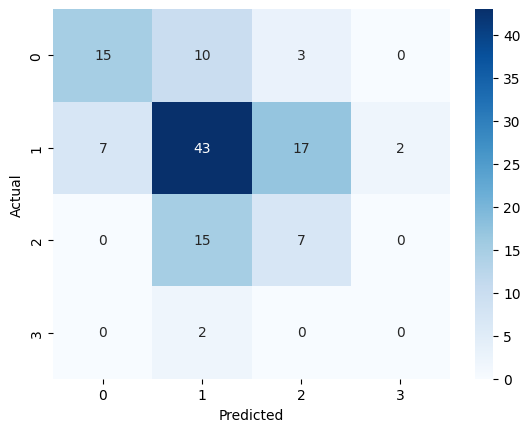

   Actual  Predicted
0       2          1
1       1          1
2       0          0
3       2          1
4       2          1
5       0          1
6       1          1
7       0          2
8       2          2
9       0          2


In [86]:

#3. Evaluation

#3.1 create predicion value
y_pred = pipeline.predict(X_test)

#3.2 Check Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#3.3 Generete Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#3.4 Create data frame result
results_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

print(results_df.head(10))